In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 100, 'display.max_columns', 200)
#строчка нужна, чтобы датасеты с множеством колонок отображались полностью
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Линейная регрессия: эксперимент на искусственных данных

Сгенерируем искусственные данные. Каждый объект имеет один признак, который записан в переменную $X$. Целевая переменная $y$ зависит от $X$ по закону $y = 7X - 10$. Поскольку восстанавливать в точности линейную зависимость не интересно, к целевой переменной добавлен шум, имеющий нормальное распределение. Ниже визуализировано распределение шума.

(array([2., 1., 2., 4., 3., 4., 2., 1., 0., 1.]),
 array([-23.01372034, -17.71116135, -12.40860235,  -7.10604336,
         -1.80348436,   3.49907463,   8.80163363,  14.10419262,
         19.40675162,  24.70931062,  30.01186961]),
 <a list of 10 Patch objects>)

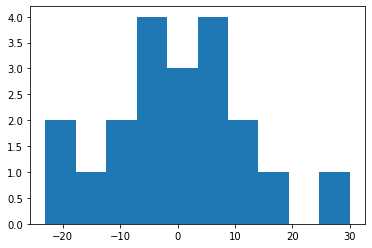

In [2]:
noise = np.random.randn(20) * 10
plt.hist(noise)

In [28]:
X = np.linspace(-5, 5, 20)
y = 10 * X - 7 + noise

X = X.reshape(-1,1) 
# Изменение формы необходимо, поскольку на вход линейной регрессии 
# должна подаваться двумерная матрица, а не вектор
X.shape
print(y)

[-52.41547434 -21.72497249 -52.75722061 -47.32800268 -37.13887057
 -53.69793087 -46.84408466 -27.84645229  -8.70660468  -7.94948425
   9.44124159  11.23364865  22.78015732  -3.94318347   7.23714783
  17.76242547  34.84152772  32.98310871  46.09901369  40.91436633]


### Задание 1 (0 баллов)
Разбейте данные на train и test в соотношении 1:1. Используйте функцию ``sklearn.model_selection.train_test_split``.

In [4]:
from sklearn.model_selection import train_test_split

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1)
X_train.shape
print(y_train)
print (y_test)

[ -3.94318347 -52.41547434  40.91436633  46.09901369  -7.94948425
  17.76242547  -8.70660468  22.78015732  11.23364865 -53.69793087]
[-47.32800268  34.84152772 -46.84408466   9.44124159 -52.75722061
   7.23714783 -37.13887057  32.98310871 -27.84645229 -21.72497249]


Визуализируем данные, используя библиотеку matplotlib.

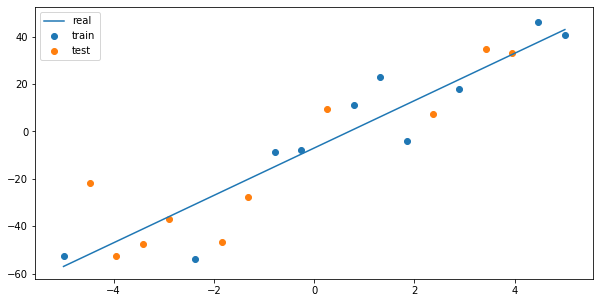

In [9]:
plt.figure(figsize=(10, 5))
plt.plot(X, 10 * X - 7, label='real')
plt.scatter(X_train, y_train, label='train')
plt.scatter(X_test, y_test, label='test')
plt.legend()
plt.show()

### Задание 2 (1 балл)
Обучите модель линейной регрессии на тренировочной выборке и предскажите значения на тестовой.
Предсказанные ответы сохраните в переменную ``predictions``, а веса модели (угол наклона прямой и свободный член) --- в переменные ``w``, ``b``. О том, где внутри модели сохраняются веса, можно прочесть в <a href=https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html>документации</a>.

In [10]:
from sklearn.linear_model import LinearRegression

In [23]:
model = LinearRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)

w = model.coef_
b = model.intercept_

In [24]:
w, b

(array([10.47955065]), -7.065636077073145)

Визуализируем предсказания.

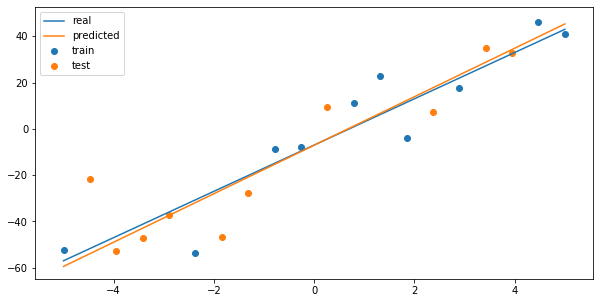

In [25]:
plt.figure(figsize=(10, 5))
plt.plot(X, 10 * X - 7, label='real')
plt.scatter(X_train, y_train, label='train')
plt.scatter(X_test, y_test, label='test')
plt.plot(X, X * w + b, label='predicted')
plt.legend()
plt.show()

### Задание 3 (1 балл)
Вычислите среднеквадратичную и среднюю абсолютную ошибку на обучающем и тестовом множествах.

In [27]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

y_train_predicted = model.predict(X_train)
y_test_predicted = model.predict(X_test)

print('y_train_predicted:', y_train_predicted)

Train_MSE = mean_squared_error(y_train, y_train_predicted)
Test_MSE = mean_squared_error(y_test, y_test_predicted)

print('Train MSE: ', Train_MSE)
print('Test MSE: ', Test_MSE)

y_train_predicted: [ 12.23879933 -59.46338934  45.33211718  39.81656421  -9.82341256
  23.26990528 -15.33896554   6.72324636   1.20769339 -31.88562446]
Train MSE:  128.24683981655417
Test MSE:  188.26807365381492


In [30]:
Train_MAE = mean_absolute_error(y_train, y_train_predicted)
Test_MAE = mean_absolute_error(y_test, y_test_predicted)
print('Train MAE: ', Train_MAE)
print('Test MAE: ', Test_MAE)

Train MAE:  9.583903973463062
Test MAE:  10.032760481591932


### Задание 4 (1 балл)
Сделайте выводы. Верно ли, что ошибка на train меньше, чем на test? В связи с чем это происходит?

Ваши выводы: Да, верно. Ошибка на train меньше, чем на test. Вероятно, это связано с тем, что обучение модели происходило на выборке train.